In [9]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
# Load dataset
df = pd.read_excel('https://github.com/febbisena/DataMining/raw/refs/heads/main/Pumpkin_Seeds_Dataset.xlsx')
print(df.head())

    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçev

In [11]:
# Dataset info
df.info()
print("\nMissing values:\n", df.isna().sum())

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB

Missing values:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    

In [12]:
# Label Encoding
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])
print("\nLabel Encoding:")
for index, class_label in enumerate(encoder.classes_):
    print(f"{index}: {class_label}")


Label Encoding:
0: Çerçevelik
1: Ürgüp Sivrisi


In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\nTraining data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 1875
Testing data size: 625


In [14]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

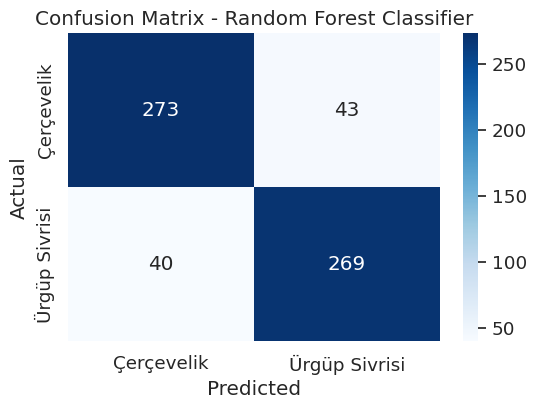

In [16]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [17]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:
               precision    recall  f1-score   support

   Çerçevelik     0.8722    0.8639    0.8680       316
Ürgüp Sivrisi     0.8622    0.8706    0.8663       309

     accuracy                         0.8672       625
    macro avg     0.8672    0.8672    0.8672       625
 weighted avg     0.8672    0.8672    0.8672       625



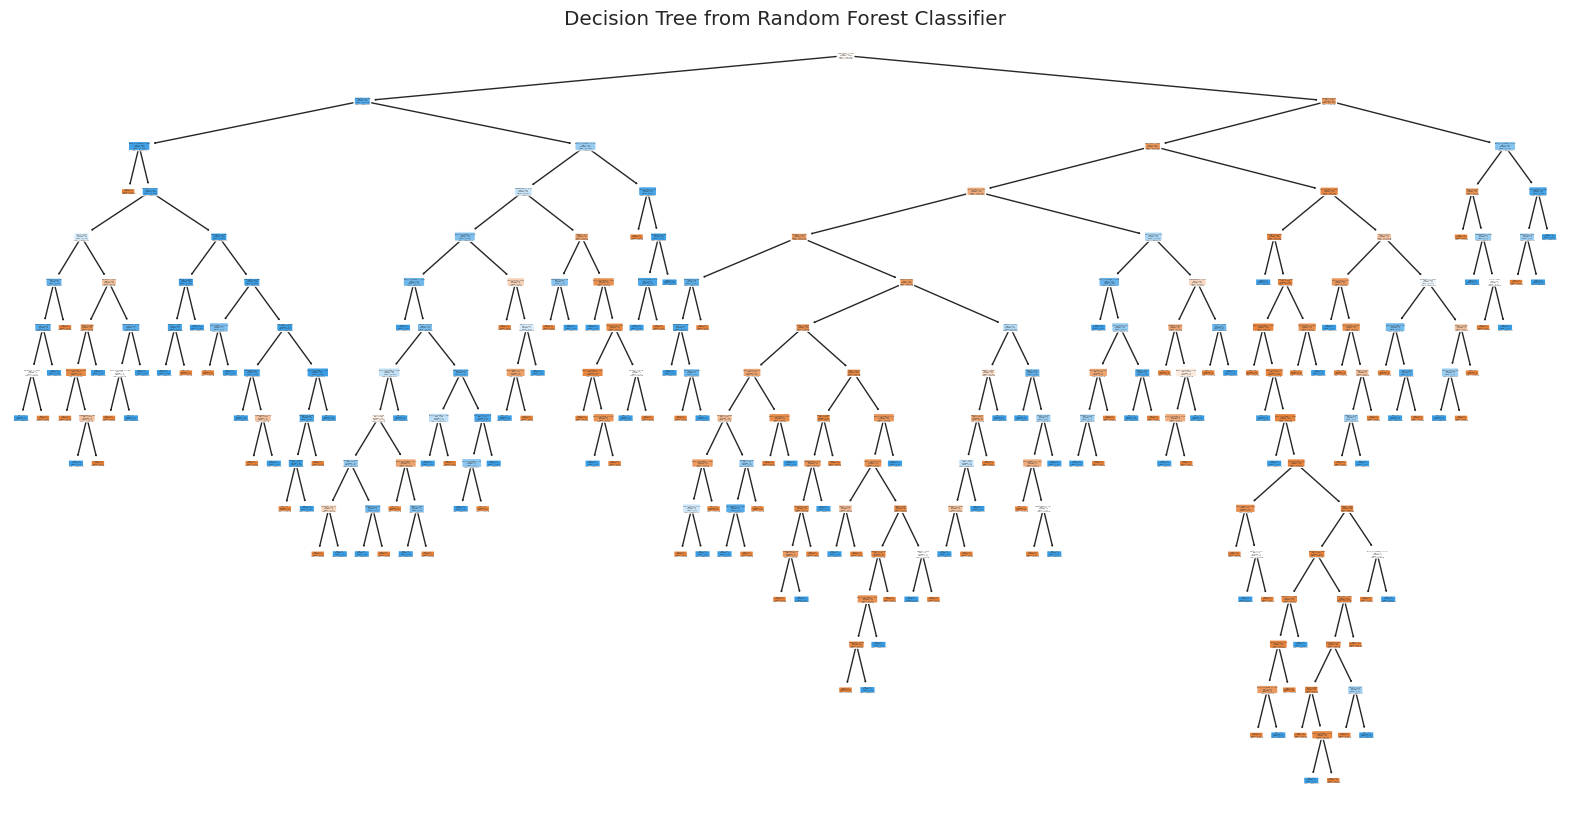

In [18]:
# Visualize a Decision Tree from the Random Forest
plt.figure(figsize=(20, 10))
estimator = rf_classifier.estimators_[0]
tree.plot_tree(estimator, filled=True, feature_names=X.columns, class_names=encoder.classes_, rounded=True)
plt.title("Decision Tree from Random Forest Classifier")
plt.show()